# _The Sparks Foundation_ 

### Name:- Niraj Namdeo Palve

####  ***Task_1:- Predict the percentage of an student based on the no. of study hours using Supervised Learning***

# _Simple Linear Regression_

In [1]:
import pandas as pd            ## Importing necessary libraries
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Dataset:- http://bit.ly/w-data

### Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"    ## Loading Dataset
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Understanding

In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
import warnings
warnings.filterwarnings('ignore')

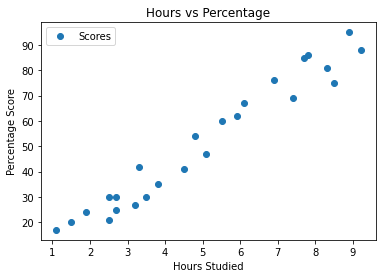

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### It seems that there is a positive linear relationship between number of hours studied and percentage of score

#### Prepairing Data

In [8]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

### Training the Algorithm

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_train)

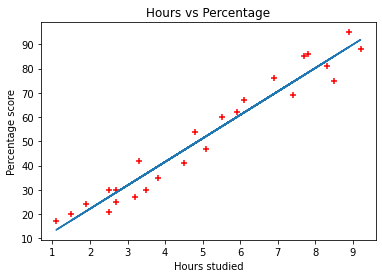

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, marker='+',color='red')
plt.plot(X, line);
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

In [14]:
print('Test Score')
print(regressor.score(X_test, y_test))
print('Training score')
print(regressor.score(X_train, y_train))

Test Score
0.9678055545167994
Training score
0.9491209376364416


In [15]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [16]:
y_pred

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

In [17]:
y_pred[:5]

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959])

In [18]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred[:5]})  
df1 

,Actual,Predicted
0,81,28.968503
1,30,34.777750
2,21,52.205491
3,76,39.618789
4,62,17.350010


In [19]:
# Let's predict the score for 9.30 hours

In [20]:
print("The score of student who studied for 9.30 hours a day ",regressor.predict([[9.30]]))

The score of student who studied for 9.30 hours a day  [92.87021919]


### Model Evaluation Metrics

In [21]:
print('Mean Squared Error:', 
      mean_squared_error(y_test, y_pred[:5]))

print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred[:5]))

Mean Squared Error: 1404.2200673968694
Mean Absolute Error: 33.80918778157651
